In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("anime_score_pred_scaled_without_outliers_selected.parquet")

**plotting all target vs scaled features first**

In [4]:


plt.figure(figsize=(8, 5))
plt.scatter(df['release_year_scaled'], df['score_scaled'], alpha=0.5)
plt.title('Score vs Release Year (scaled)')
plt.xlabel('Release Year (scaled)')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()

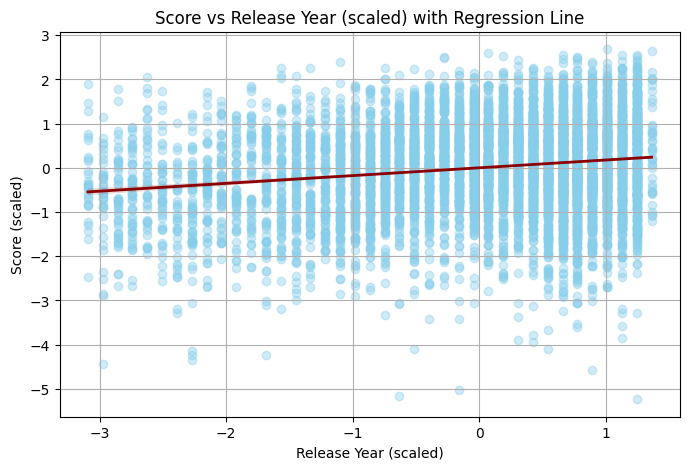

In [5]:
plt.figure(figsize=(8, 5))

# Customizing scatter and line colors
sns.regplot(
    x='release_year_scaled',
    y='score_scaled',
    data=df,
    scatter_kws={'alpha': 0.4, 'color': 'skyblue'},  # Light scatter color
    line_kws={'color': 'darkred', 'linewidth': 2}    # Bold red regression line
)

plt.title('Score vs Release Year (scaled) with Regression Line')
plt.xlabel('Release Year (scaled)')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()


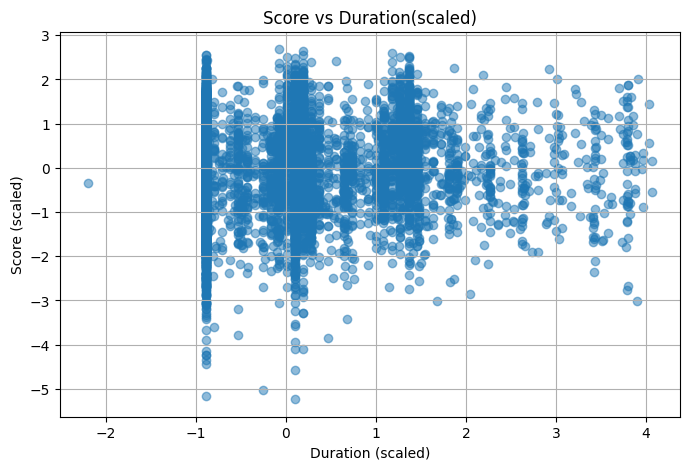

In [6]:

plt.figure(figsize=(8, 5))
plt.scatter(df['duration_scaled'], df['score_scaled'], alpha=0.5)
plt.title('Score vs Duration(scaled)')
plt.xlabel('Duration (scaled)')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()

**A hexbin plot is a great choice when you have a lot of overlapping pointsâ€”it shows the density of data nicely using hexagonal bins (which are more visually efficient than square ones).**

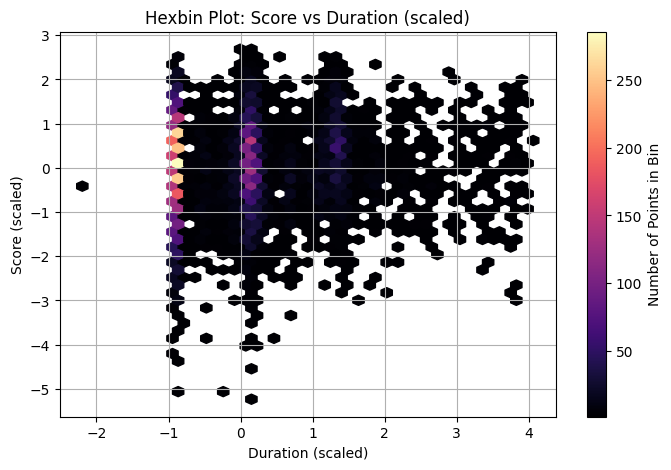

In [7]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['duration_scaled'], df['score_scaled'], gridsize=40, cmap='magma', mincnt=1)
plt.colorbar(label='Number of Points in Bin')
plt.xlabel('Duration (scaled)')
plt.ylabel('Score (scaled)')
plt.title('Hexbin Plot: Score vs Duration (scaled)')
plt.grid(True)
plt.show()

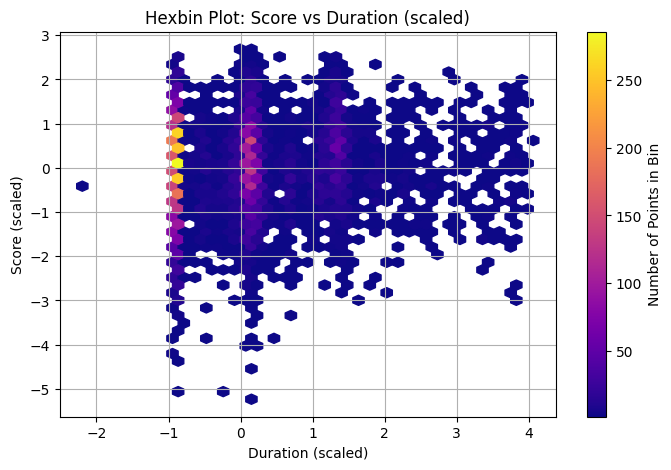

In [8]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['duration_scaled'], df['score_scaled'], gridsize=40, cmap='plasma', mincnt=1)
plt.colorbar(label='Number of Points in Bin')
plt.xlabel('Duration (scaled)')
plt.ylabel('Score (scaled)')
plt.title('Hexbin Plot: Score vs Duration (scaled)')
plt.grid(True)
plt.show()

In [9]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['duration_scaled'], df['score_scaled'], gridsize=40, cmap='viridis', mincnt=1)
plt.colorbar(label='Number of Points in Bin')
plt.xlabel('Duration (scaled)')
plt.ylabel('Score (scaled)')
plt.title('Hexbin Plot: Score vs Duration (scaled)')
plt.grid(True)
plt.show()

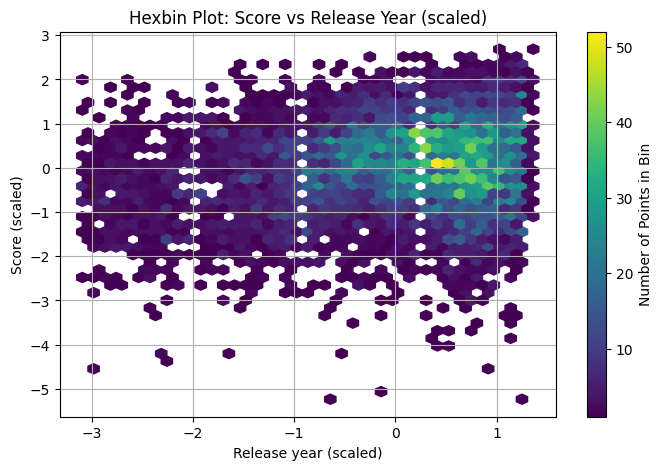

In [10]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['release_year_scaled'], df['score_scaled'], gridsize=40, cmap='viridis', mincnt=1)
plt.colorbar(label='Number of Points in Bin')
plt.xlabel('Release year (scaled)')
plt.ylabel('Score (scaled)')
plt.title('Hexbin Plot: Score vs Release Year (scaled)')
plt.grid(True)
plt.show()

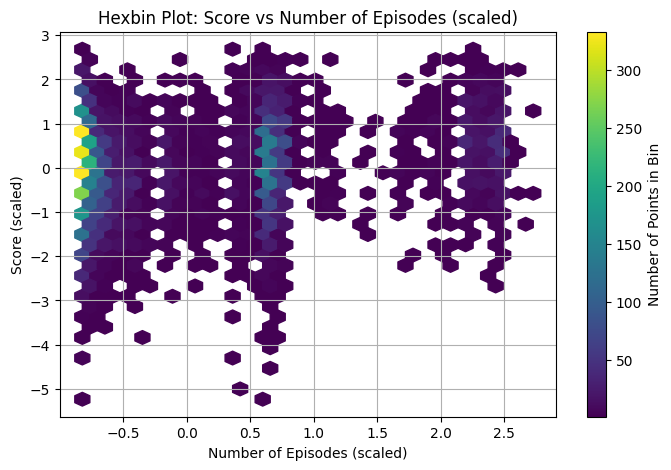

In [11]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['num_episodes_scaled'], df['score_scaled'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Number of Points in Bin')
plt.xlabel('Number of Episodes (scaled)')
plt.ylabel('Score (scaled)')
plt.title('Hexbin Plot: Score vs Number of Episodes (scaled)')
plt.grid(True)
plt.show()


In [12]:
df_org = pd.read_parquet("anime_data_encoded_scaled_with_originals.parquet")

# Optional: categorize episode count (not scaled version)
df_org['episode_bins'] = pd.cut(df_org['num_episodes'], bins=[0, 12, 24, 50, 100, 500, 2000], 
                            labels=['<=12', '13-24', '25-50', '51-100', '101-500', '500+'])

plt.figure(figsize=(10, 5))
sns.boxplot(x='episode_bins', y='score_scaled', data=df_org)
plt.title('Boxplot: Score vs Number of Episodes (binned)')
plt.xlabel('Number of Episodes')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()


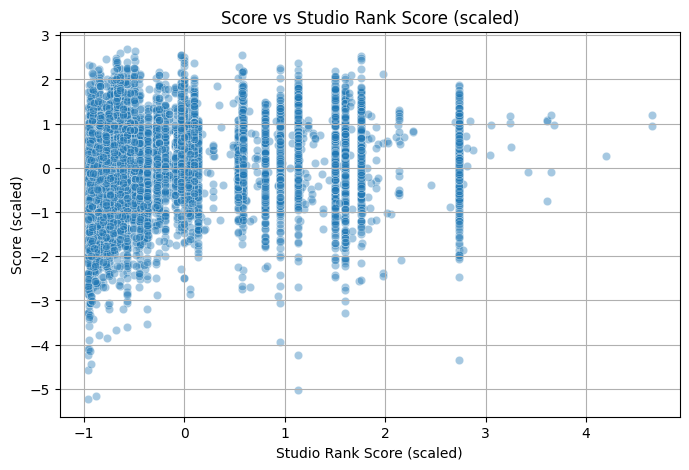

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='studio_rank_score_scaled', y='score_scaled', data=df, alpha=0.4)
plt.title('Score vs Studio Rank Score (scaled)')
plt.xlabel('Studio Rank Score (scaled)')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()


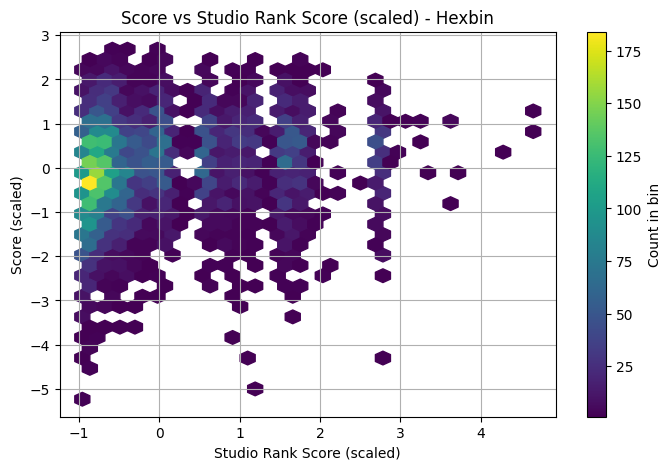

In [14]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['studio_rank_score_scaled'], df['score_scaled'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Count in bin')
plt.title('Score vs Studio Rank Score (scaled) - Hexbin')
plt.xlabel('Studio Rank Score (scaled)')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()


In [15]:
# Create buckets from scaled studio scores
import numpy as np
df['studio_bucket'] = pd.cut(df['studio_rank_score_scaled'], bins=[-np.inf, -0.25, 0.25, 1.5, np.inf], 
                             labels=['Low', 'Mid', 'High', 'Top'])

# Plot a boxplot of score vs these buckets
plt.figure(figsize=(8, 5))
sns.boxplot(x='studio_bucket', y='score_scaled', data=df)
plt.title('Score Distribution by Studio Rank Bucket')
plt.xlabel('Studio Rank Bucket')
plt.ylabel('Score (scaled)')
plt.grid(True)
plt.show()
